In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

In [137]:
data = pd.read_csv('employee_churn_data.csv')
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [138]:
data.dtypes

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left              object
dtype: object

In [139]:
data.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [140]:
data.duplicated().sum()

0

In [141]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [142]:
df = data
cols = df.columns
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


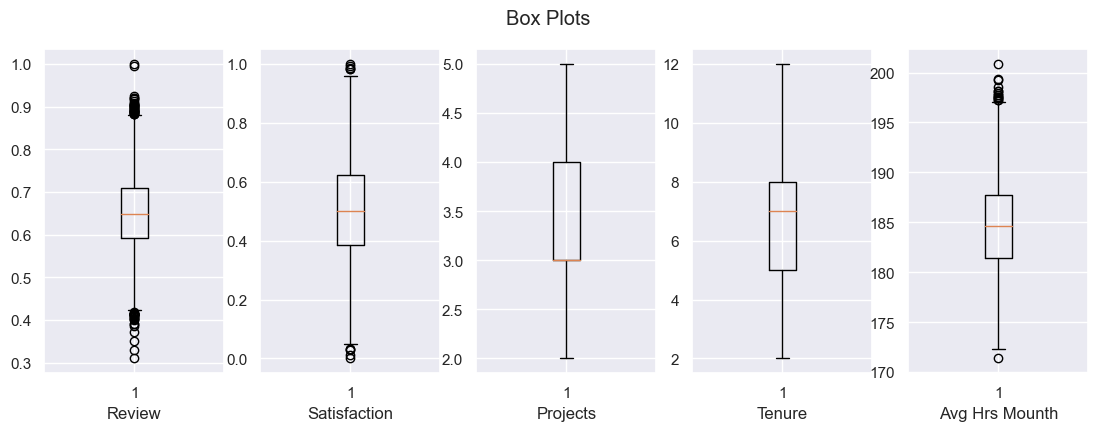

In [143]:
sns.set()
fig, axs = plt.subplots(1, 5, figsize=(12, 4))
axs[0].boxplot(x=df['review'])
axs[0].set_xlabel("Review")
axs[1].boxplot(x=df['satisfaction'])
axs[1].set_xlabel("Satisfaction")
axs[2].boxplot(x=df['projects'])
axs[2].set_xlabel("Projects")
axs[3].boxplot(x=df['tenure'])
axs[3].set_xlabel("Tenure")
axs[4].boxplot(x=df['avg_hrs_month'])
axs[4].set_xlabel("Avg Hrs Mounth")
fig.suptitle('Box Plots')
plt.show();

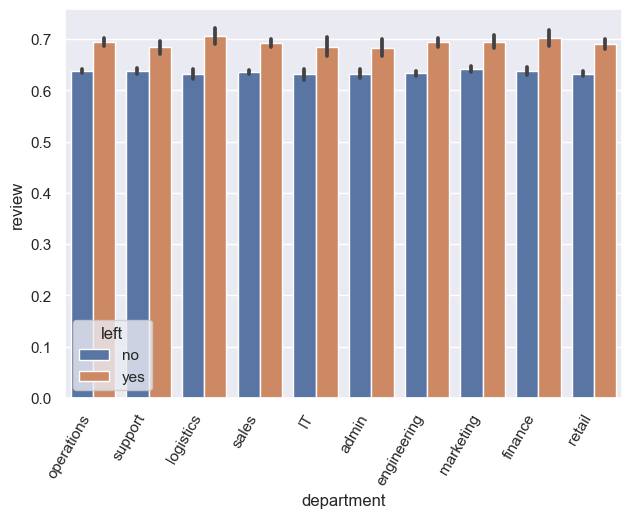

In [144]:
sns.barplot(data=df, x="department", y="review", hue="left")
plt.xticks(rotation=60, ha='right')
plt.show()

In [145]:
cols

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

In [146]:
df_alt = pd.get_dummies(df, columns=['department'])

In [147]:
df_alt.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support
0,0,0.577569,3,low,5.0,0.626759,0,180.866070,no,0,0,0,0,0,0,1,0,0,0
1,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no,0,0,0,0,0,0,1,0,0,0
2,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no,0,0,0,0,0,0,0,0,0,1
3,0,0.675158,4,high,8.0,0.440139,0,188.707545,no,0,0,0,0,1,0,0,0,0,0
4,0,0.676203,3,high,5.0,0.577607,1,179.821083,no,0,0,0,0,0,0,0,0,1,0


In [148]:
df_alt['left'] = df_alt['left'].map({'no': 0, 'yes': 1})
df_alt['salary'] = df_alt['salary'].map({'low': 1, 'medium': 2, 'high': 3})

In [149]:
df_alt

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,0,0,0,0,0,0,0,1,0,0,0
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,0,0,0,0,0,0,0,1,0,0,0
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,0,0,1
3,0,0.675158,4,3,8.0,0.440139,0,188.707545,0,0,0,0,0,1,0,0,0,0,0
4,0,0.676203,3,3,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,2,8.0,0.543641,0,188.155738,1,0,0,0,0,0,0,1,0,0,0
9536,0,0.746887,3,2,8.0,0.549048,0,188.176164,1,0,0,0,0,1,0,0,0,0,0
9537,0,0.557980,3,1,7.0,0.705425,0,186.531008,1,0,0,0,0,0,0,1,0,0,0
9538,0,0.584446,4,2,8.0,0.607287,1,187.641370,1,1,0,0,0,0,0,0,0,0,0


In [150]:
X = df_alt.drop(columns='left')
y = df_alt['left']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [153]:
y_pred = rf.predict(X_test)

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1330
           1       0.81      0.68      0.74       578

    accuracy                           0.86      1908
   macro avg       0.84      0.81      0.82      1908
weighted avg       0.85      0.86      0.85      1908



In [155]:
importances = list(rf.feature_importances_)
features = list(X.columns)

In [156]:
fimp = {'feature':features, 'importance':importances}
df_fimp = pd.DataFrame(data=fimp)
df_fimp = df_fimp.sort_values('importance', ascending=False).reset_index(drop=True)
df_fimp

,feature,importance
0,satisfaction,0.279565
1,avg_hrs_month,0.260402
2,review,0.257252
3,tenure,0.080650
4,projects,0.023864
5,salary,0.021456
6,bonus,0.012535
7,department_engineering,0.008018
8,department_sales,0.007786
9,department_operations,0.007634


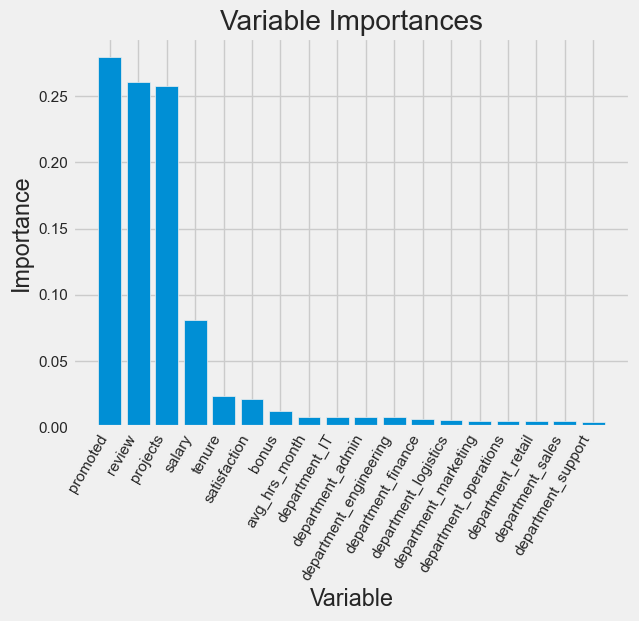

In [157]:
plt.style.use('fivethirtyeight')

x_values = list(range(len(df_fimp['importance'])))
# Make a bar chart
plt.bar(x_values, df_fimp['importance'], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance') 
plt.xlabel('Variable') 
plt.xticks(rotation=60, ha='right')
plt.title('Variable Importances')
plt.show();

In [158]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42).fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1330
           1       0.69      0.24      0.36       578

    accuracy                           0.74      1908
   macro avg       0.72      0.60      0.60      1908
weighted avg       0.73      0.74      0.69      1908

